In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%matplotlib inline
plt.rcParams['font.size'] = 7
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Arial' 

annotations = pd.read_csv('../data_tables/erg_annos.tsv',sep = '\t', index_col='var_id')
var_fits = pd.read_csv('../data_tables/Fitness_files/ergosterol_pathway_fitness.tsv', sep = '\t')
annotated_fits = var_fits.merge(annotations,'inner','var_id')


In [2]:
lov_cocl_fitness_df = annotated_fits[annotated_fits['condition'].isin(['COCL','LOV'])]\
                        .pivot('var_id','condition','coef')[['COCL','LOV']].dropna()

pearsonr(lov_cocl_fitness_df['LOV'], lov_cocl_fitness_df['COCL'])

(-0.11783949372191693, 1.1228155612837654e-05)

In [3]:
lov_hits = annotated_fits[(annotated_fits['condition']=='LOV')&(annotated_fits['padj']<.01)].var_id.unique()
cocl_hits = annotated_fits[(annotated_fits['condition']=='COCL')&(annotated_fits['padj']<.01)].var_id.unique()
hit_in_both = set(lov_hits).intersection(set(cocl_hits))

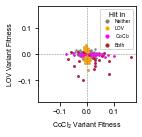

In [4]:
fig,ax  = plt.subplots(figsize = (1.75,1.75))
annotated_fits[annotated_fits['condition'].isin(['COCL','LOV'])].pivot('var_id','condition','coef').plot.scatter('COCL','LOV', ax = ax, color = 'grey', s = 2)
annotated_fits[annotated_fits['condition'].isin(['COCL','LOV'])&(annotated_fits['var_id'].isin(lov_hits))].pivot('var_id','condition','coef').plot.scatter('COCL','LOV',ax = ax, color = 'orange', s = 2)
annotated_fits[annotated_fits['condition'].isin(['COCL','LOV'])&(annotated_fits['var_id'].isin(cocl_hits))].pivot('var_id','condition','coef').plot.scatter('COCL','LOV',ax = ax, color = 'magenta', s = 2)
annotated_fits[annotated_fits['condition'].isin(['COCL','LOV'])&(annotated_fits['var_id'].isin(hit_in_both))].pivot('var_id','condition','coef').plot.scatter('COCL','LOV',ax = ax, color = 'brown', s = 2)
lgnd = plt.legend(['Neither', 'LOV', 'CoCl$_2$', 'Both'],title = 'Hit in', fontsize = 5,handletextpad = .5, labelspacing = .3)
lgnd.legendHandles[0]._sizes = [10]
lgnd.legendHandles[1]._sizes = [10]
lgnd.legendHandles[2]._sizes = [10]
lgnd.legendHandles[3]._sizes = [10]
plt.axhline(0,linestyle='dashed', color= 'grey', linewidth = 0.5)
plt.axvline(0,linestyle='dashed', color= 'grey', linewidth = 0.5)

plt.xlim(-.18,.18)
plt.ylim(-.18,.18)
plt.xlabel('CoCl$_2$ Variant Fitness')
plt.ylabel('LOV Variant Fitness')

plt.savefig('../GxE_Figures/Figure_4/fig4d_lov_v_cocl_gxe_FC.svg')